# Analisis Exploratorio de Anfibios

1) Bibliografía
- UCI Machine Learning Repository. (s. f.). https://archive.ics.uci.edu/dataset/528/amphibians
- Marcin Blachnik, Marek S, Dominika D-  Predicting presence of amphibian species using features obtained from GIS and satellite images.. ISPRS International Journal of Geo-Information 8 (3) pp. 123. MDPI. 2019

2) El objetivo del ejercicio es predecir la presencia de anfibios en un lugar basado en datos proporcionados por un sistema de informacion georeferenciada (SIG)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Importacion de datos 

In [9]:
# Importacion de datos el archivo esta en CSV (colon separared values) 
file_path = './data/extracted/amphibians.csv'
data = pd.read_csv(file_path, sep = ';', skiprows=1)

In [10]:
data.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


## Analisis y Explicacion del set de datos

El set de datos contiene 189 observaciones con 23 caracteristicas

In [6]:
data.shape

(189, 23)

Como podemos ver con variables categoricas con numeros enteros

In [12]:
data.describe(include='all')

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
count,189.000000,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,95.000000,NaN,9633.227513,1.566138,4.952381,1.904762,4.232804,5.391534,5.84127,0.841270,...,2.502646,0.047619,1.015873,0.571429,0.783069,0.656085,0.306878,0.375661,0.306878,0.111111
std,54.703748,NaN,46256.078309,1.544419,5.590918,1.317407,3.434615,3.515185,3.29348,1.315291,...,2.640971,0.296894,0.125316,0.496186,0.413250,0.476275,0.462423,0.485580,0.462423,0.315104
min,1.000000,NaN,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,NaN,300.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,NaN,700.000000,1.000000,1.000000,2.000000,2.000000,6.000000,6.00000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,142.000000,NaN,3300.000000,1.000000,12.000000,3.000000,7.000000,9.000000,9.00000,3.000000,...,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Descripcion de las variables del dataset (Fuente, web del repositorio de UC Irvine)

| variable | Tipo | Descripcion |
|-----------|-----------|-----------|
|	ID	|	Integer	|	Identificador (no se usa)	|
|	Motorway	|	Categorical	|	Carretera (no se usa)	|
|	SR	|	Numerical	|	metros cuadrados de superficie en el reservorio	|
|	NR	|	Numerical	|	cantidad entera de reservorios en la zona	|
|	TR	|	Categorical	|	Tipo de reservorio (8 tipos diferentes)	|
|	VR	|	Categorical	|	Presencia de plantas (5 niveles)	|
|	SUR1	|	Categorical	|	Primer tipo de terreno en la zona (9 tipos diferentes)	|
|	SUR2	|	Categorical	|	Segundo tipo de terreno en la zona (9 tipos diferentes)	|
|	SUR3	|	Categorical	|	Tercer tipo de terreno en la zona (9 tipos diferentes)	|
|	UR	|	Categorical	|	Nivel de uso del agua del reservorio (ordinal de menor a mayor uso)	|
|	FR	|	Categorical	|	Nivel de intensidad de pesca en reservorio (ordinal de menor a mayor uso)	|
|	OR	|	Numerical	|	Porcentaje de acceso a areas no desarrolladas (espacio libre, terrenos no construidos y costa)	|
|	RR	|	Ordinal	|	Distancia en metros entre carreteras, caminos vecinales etc y el reservorio	|
|	BR	|	Ordinal	|	Distancia en metros entre el reservorio y la construccion ms cercana	|
|	MR	|	Categorical	|	Nivel de suciedad (de menor a mayor)	|
|	CR	|	Categorical	|	Tipo de orilla (natural o de cemento)	|
|	Green frogs	|	Label 1	|	Presencia de ranas verdes (Binario SI = 1 , NO = 0)	|
|	Brown frogs	|	Label 2	|	Presencia de ranas marron (Binario SI = 1 , NO = 0)	|
|	Common toad	|	Label 3	|	Presencia de sapos (Binario SI = 1 , NO = 0)	|
|	Fire-bellied toad	|	Label 4	|	Presencia de bombinas (Binario SI = 1 , NO = 0)	|
|	Tree frog	|	Label 5	|	Presencia de ranas arborea (Binario SI = 1 , NO = 0)	|
|	Common newt	|	Label 6	|	Presencia de tritones (Binario SI = 1 , NO = 0)	|
|	Great crested newt	|	Label 7	|	Presencia de tritones con cresta (Binario SI = 1 , NO = 0)	|


Analisis de las variables

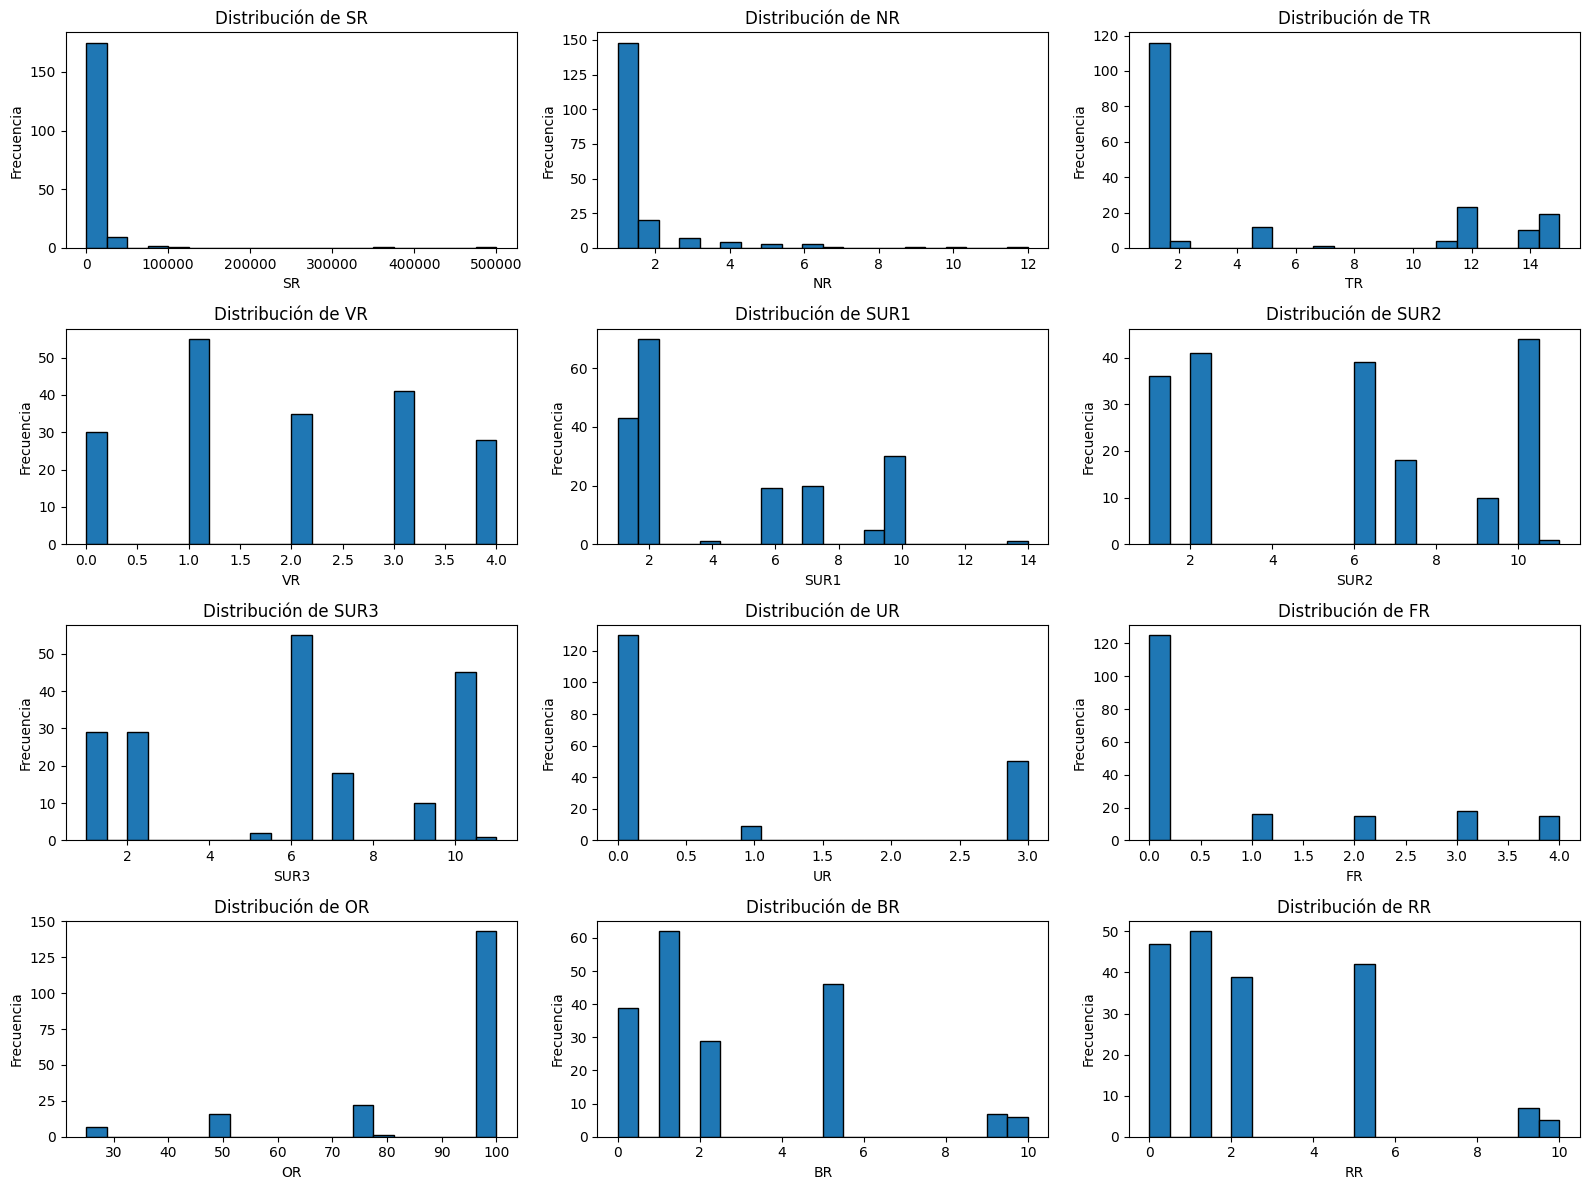

In [18]:
# Elegimos las columnas a analizar
numerical_columns = ['SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'OR', 'BR', 'RR']

# Dibujamos area de trazado de graficos
plt.figure(figsize=(16, 12))

# for loop para colocar la informacion en modo histograma
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(data[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Alto sesgo hacia la derecha de SR y NR (metros cuadrados y cantidad de estanques en la zona)

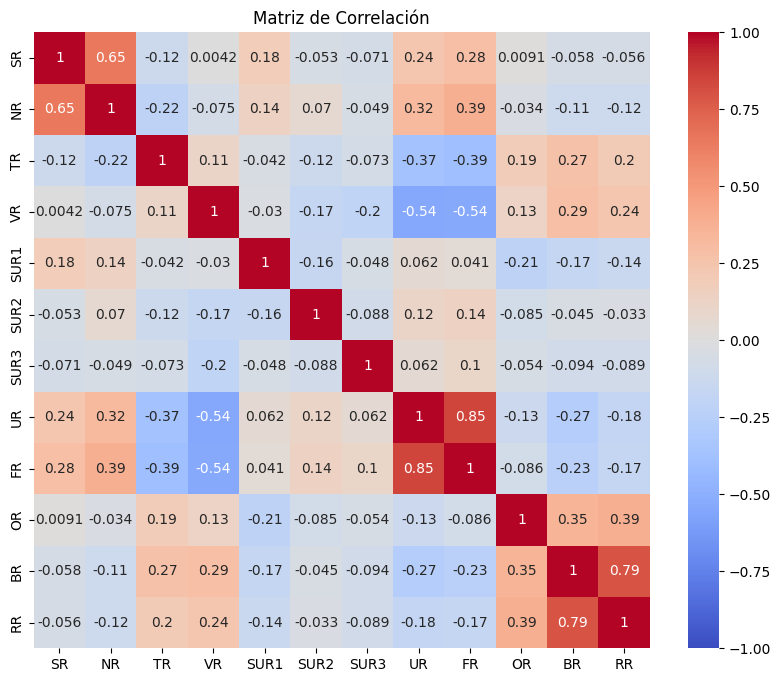

In [19]:
import seaborn as sns

# Calculate the correlation matrix for the numerical columns
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matriz de Correlación')
plt.show()


1) Alta correlacion entre:
- FR-UR : Uso para pesca y uso general del agua en el reservorio
- RR - BR: Distancia del estanque al camino mas cercano es altamente correlacionado con la distancia del estanque al terreno mas cercano con uns construccion


In [22]:
# Definimos una lista con las variables objetivo binarias

binary_targets = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']

# Calculamos una correlacion 
correlaciones = data[numerical_columns + binary_targets].corr().loc[numerical_columns, binary_targets]
corr_fuertes = correlation_with_binary_targets.abs().sort_values(by=binary_targets, ascending=False)

# Imprimimos la matriz de correlacion
corr_fuertes


,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
TR,0.406217,0.020830,0.267864,0.193886,0.201060,0.278239,0.220408
UR,0.319028,0.053901,0.141653,0.028041,0.018904,0.063023,0.029946
FR,0.298382,0.021846,0.182241,0.050273,0.015372,0.075837,0.022232
NR,0.241949,0.043435,0.135942,0.165077,0.168838,0.142733,0.143305
SUR3,0.178557,0.001923,0.075679,0.055161,0.058971,0.034205,0.111052
SR,0.159821,0.061848,0.072061,0.193712,0.141922,0.148510,0.166887
SUR2,0.115015,0.003855,0.096743,0.063126,0.019324,0.036948,0.056559
VR,0.095322,0.079093,0.035524,0.048230,0.147690,0.013305,0.051254
RR,0.080822,0.059587,0.045793,0.048686,0.053609,0.015215,0.060285
SUR1,0.065099,0.032023,0.094729,0.018429,0.055907,0.112185,0.025120


Atencion: Esta es una correlacion simple, no involucra la presencia de una dos o mas variedades de anfibios, para tener una mejor prediccion es necesario un modelo de ML mas robusto

- Ranas verdes tiene su correlación más fuerte con Tipo de reservorio (0.41).
- Ranas marrones tiene una correlación mayor con % de acceso a areas no construidas (0.19).
- Sapo comun, bombina, rana arborea y los tritones tienen mayor correlacion con tipo de reservorio (0.27).
